# MA3K7 Assignment 34

Name - Timothy Yap

Student ID - 21611367

In [1]:
# Libraries
import numpy as np
import scipy
import matplotlib.pyplot as plt
import random
import time

# Step game function
def stepGame():
    temp = 1
    for _ in range(24):
        temp += 1 + random.getrandbits(1)
        if temp == 25:
            return 1
        if temp == 26:
            return 0
        
# Average function
def avgStep(n):
    count = 0
    for _ in range(n):
        count += stepGame()
    retVal = count / n
    return retVal
    
num = 1000000
print(avgStep(num))

0.666391


In [2]:
# Testing efficiency
def rand1(n):
    t0 = time.time()
    x = 0
    for _ in range(n):
        x += 1 + random.getrandbits(1)
    t1 = time.time()
    total = t1-t0
    return total

def rand2(n):
    t0 = time.time()
    x = 0
    for _ in range(n):
        x += np.random.randint(1, 3)
    t1 = time.time()
    total = t1-t0
    return total

a = rand1(1000000)
b = rand2(1000000)
print(a)
print(b)
print(b / a)

0.052190303802490234
1.464660882949829
28.063850490173685


In [3]:
# Step game for different end values
def stepGame2(n):
    temp = 1
    for _ in range(n - 1):
        temp += 1 + random.getrandbits(1)
        if temp == n:
            return 1
        if temp == n + 1:
            return 0
        
# Average function for x
def avgStep2(n, x):
    count = 0
    for _ in range(n):
        count += stepGame2(x)
    retVal = count / n
    return retVal

print(avgStep2(1000000, 2))
print(avgStep2(1000000, 3))
print(avgStep2(1000000, 4))
print(avgStep2(1000000, 5))
print(avgStep2(1000000, 6))

0.499793
0.750462
0.624799
0.68768
0.655975


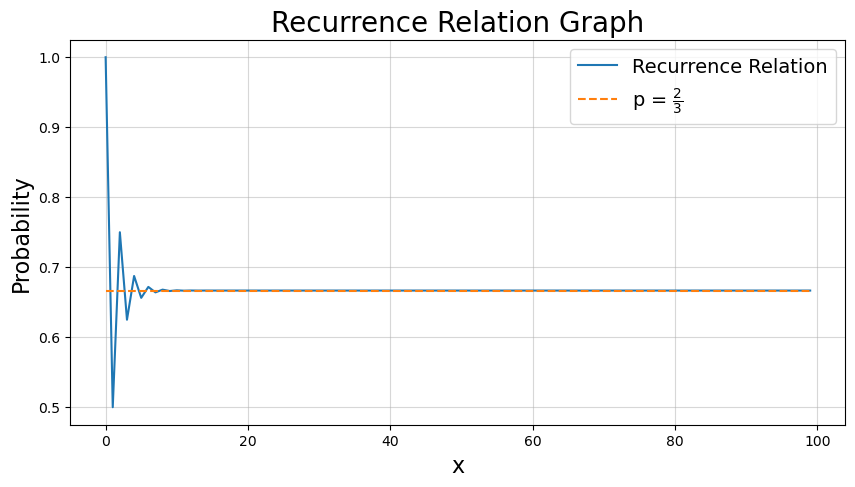

In [4]:
# Define our conjecture formula
def conj(n):
    if n == 1:
        return 1
    if n == 2:
        return 0.5
    retVal = 0.5 * conj(n-1) + 0.5 * conj(n-2)
    return retVal

# Creating a plot array using above function
def conjPlot(n):
    retArr = [1, 0.5]
    for i in range(n - 2):
        temp = 0.5 * retArr[i] + 0.5 * retArr[i+1]
        retArr.append(temp)
    return retArr

# Initialising parameters
num = 100
xArr = np.arange(num)
yRef = np.full_like(xArr, 2/3, dtype=np.double)
yArr = conjPlot(num)

# Plotting graphs
plt.figure(figsize=(10, 5))
plt.plot(xArr, yArr, label = 'Recurrence Relation')
plt.plot(xArr, yRef, '--', label = r'p = $\frac{2}{3}$')

# Graph settings
plt.title("Recurrence Relation Graph", fontsize=20)
plt.xlabel("x", fontsize=16)
plt.ylabel("Probability", fontsize=16)
plt.legend(fontsize = '14')
plt.grid(True, alpha = 0.5)
plt.savefig('RRgraph.png')

In [5]:
# Finding probabilities up to 25
conjPlot(25)

[1,
 0.5,
 0.75,
 0.625,
 0.6875,
 0.65625,
 0.671875,
 0.6640625,
 0.66796875,
 0.666015625,
 0.6669921875,
 0.66650390625,
 0.666748046875,
 0.6666259765625,
 0.66668701171875,
 0.666656494140625,
 0.6666717529296875,
 0.6666641235351562,
 0.6666679382324219,
 0.6666660308837891,
 0.6666669845581055,
 0.6666665077209473,
 0.6666667461395264,
 0.6666666269302368,
 0.6666666865348816]

In [6]:
# Lab 7 code for explicit formula

# Symbolic solution a_n

# symbolic solve characteristic eq.
import sympy as sp
from sympy.abc import m, x, y, z, k

M = sp.solve(m**2 - 0.5 * m - 0.5, m)

# symbolic solve linear system
A = sp.Matrix([[1, 1], [M[0], M[1]], [M[0]**2, M[1]**2]])
b = sp.Matrix([1,0.5])
C,= sp.linsolve((A, b), x, y)

def an(n):
    return sum(C[i]*M[i]**n for i in range(2))

an(k)

0.333333333333333*(-0.5)**k + 0.666666666666667*1.0**k

In [7]:
# Finding number of different paths
def fib(n):
    retArr = [0, 1]
    for i in range(n-1):
        temp = retArr[i] + retArr[i + 1]
        retArr.append(temp)
    return retArr

fib(25)

[0,
 1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765,
 10946,
 17711,
 28657,
 46368,
 75025]

In [8]:
from fractions import Fraction

# finding exaxt fraction
def conj(n):
    if n == 1:
        return Fraction(1)
    if n == 2:
        return Fraction(1, 2)
    retVal = Fraction(1, 2) * conj(n-1) + Fraction(1, 2) * conj(n-2)
    return retVal

conj(25)

Fraction(11184811, 16777216)

In [9]:
# Extension 
# Step game function
def extStep(n):
    temp = 1
    for _ in range(n - 1):
        temp += 1 + random.getrandbits(2)
        if temp == n:
            return 1
        if temp > n:
            return 0

# Average function
def avgExt(n, x):
    count = 0
    for _ in range(n):
        count += extStep(x)
    retVal = count / n
    return retVal
    
num = 1000000
print(avgExt(num, 25))

0.400086


In [10]:
for i in range(2, 6):
    print(Fraction(5**(i-2), 4**(i-1)))
    

1/4
5/16
25/64
125/256


0.39999238267585113
0.48828125


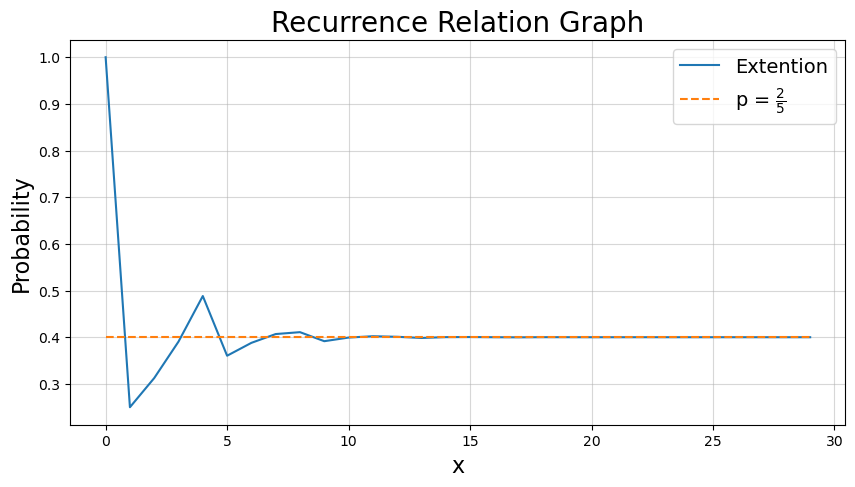

In [11]:
# Define our conjecture formula
def conjExt(n):
    if n == 1:
        return 1
    if n == 2:
        return 1/4
    if n == 3:
        return 5/16
    if n == 4:
        return 25/64
    retVal = 0.25 * conjExt(n-1) + 0.25 * conjExt(n-2) + 0.25 * conjExt(n-3) + 0.25 * conjExt(n-4)
    return retVal

print(conjExt(25))
print(125/256)

# Creating a plot array using above function
def extPlot(n):
    retArr = [1, 1/4, 5/16, 25/64]
    for i in range(n - 4):
        temp = 0.25 * retArr[i] + 0.25 * retArr[i+1] + 0.25 * retArr[i+2] + 0.25 * retArr[i+3]
        retArr.append(temp)
    return retArr

# Initialising parameters
num = 30
xArr = np.arange(num)
yRef = np.full_like(xArr, 2/5, dtype=np.double)
yArr = extPlot(num)

# Plotting graphs
plt.figure(figsize=(10, 5))
plt.plot(xArr, yArr, label = 'Extention')
plt.plot(xArr, yRef, '--', label = r'p = $\frac{2}{5}$')

# Graph settings
plt.title("Recurrence Relation Graph", fontsize=20)
plt.xlabel("x", fontsize=16)
plt.ylabel("Probability", fontsize=16)
plt.legend(fontsize = '14')
plt.grid(True, alpha = 0.5)
plt.savefig('ExtGraph.png')

In [12]:
# Extended step exercise function
def ext2():
    temp = 25
    for _ in range(25):
        temp += 1 + random.getrandbits(1)
        if temp == 50:
            return 1
        if temp > 50:
            return 0
        
# Average function for x
def extAvg(n):
    count = 0
    for _ in range(n):
        count += ext2()
    retVal = count / n
    return retVal

extAvg(100000)

0.66755